In [1]:
# Imports
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Examining BMI Over Time

In [18]:
path = '../data/BMX/'
suffix = {
    '': 1999, 'B': 2001, 'C': 2003, 'D': 2005, 'E': 2007, 'F': 2009, 'G': 2011, 'H': 2013,
    'I': 2015, 'J': 2017
}

# Vars of interest: BMXWT: Weight in kg, BMXHT: Height in cm

df_list = []
for file in os.listdir(path=path):
    if file.endswith('.XPT'):
        file_path = os.path.join(path, file)

        # Load the XPT file
        df = pd.read_sas(file_path)
        # Verify no dupes and check nulls:
        unique_seqn = df['SEQN'].unique()
        print(f'Length of df3 matches # of seqn3? {len(df) == len(unique_seqn)} ({len(df)} == {len(unique_seqn)})')
        print(f'{file} has {len(df[df["BMXWT"].isna()])} nulls.')
        df = df[~df['BMXWT'].isna()]
        df = df[~df['BMXHT'].isna()]
        
        suffix_split = file.split('_')
        try:
            suffix_split = suffix_split[1].split('.')
            suffix_split = suffix_split[0]
        except IndexError:
            suffix_split = ''
        df['Year'] = suffix[suffix_split]
        df['BMI'] = df['BMXWT'] / ((df['BMXHT'] / 100) ** 2)
        
        df_list.append(df)
    else:
        pass

combined_df = pd.concat(df_list)
combined_df = combined_df[combined_df['Year'].isin([1999, 2017])]
combined_df

Length of df3 matches # of seqn3? True (9282 == 9282)
BMX.XPT has 85 nulls.
Length of df3 matches # of seqn3? True (10477 == 10477)
BMX_B.XPT has 652 nulls.
Length of df3 matches # of seqn3? True (9643 == 9643)
BMX_C.XPT has 114 nulls.
Length of df3 matches # of seqn3? True (9950 == 9950)
BMX_D.XPT has 103 nulls.
Length of df3 matches # of seqn3? True (9762 == 9762)
BMX_E.XPT has 131 nulls.
Length of df3 matches # of seqn3? True (10253 == 10253)
BMX_F.XPT has 91 nulls.
Length of df3 matches # of seqn3? True (9338 == 9338)
BMX_G.XPT has 95 nulls.
Length of df3 matches # of seqn3? True (9813 == 9813)
BMX_H.XPT has 90 nulls.
Length of df3 matches # of seqn3? True (9544 == 9544)
BMX_I.XPT has 99 nulls.
Length of df3 matches # of seqn3? True (8704 == 8704)
BMX_J.XPT has 124 nulls.


,SEQN,BMAEXLEN,BMAEXSTS,BMAEXCMT,BMXWT,BMIWT,BMXRECUM,BMIRECUM,BMXHEAD,BMIHEAD,...,BMDCALFF,BMDBMIC,BMXSAD1,BMXSAD2,BMXSAD3,BMXSAD4,BMDAVSAD,BMDSADCM,BMXHIP,BMIHIP
0,1.0,289.0,1.0,NaN,12.5,3.0,93.2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,376.0,1.0,NaN,75.4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,199.0,1.0,NaN,32.9,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,277.0,1.0,NaN,92.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6.0,252.0,1.0,NaN,59.2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8699,102952.0,NaN,NaN,NaN,49.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.3,NaN
8700,102953.0,NaN,NaN,NaN,97.4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112.8,NaN
8701,102954.0,NaN,NaN,NaN,69.1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.7,NaN
8702,102955.0,NaN,NaN,NaN,111.9,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128.3,NaN


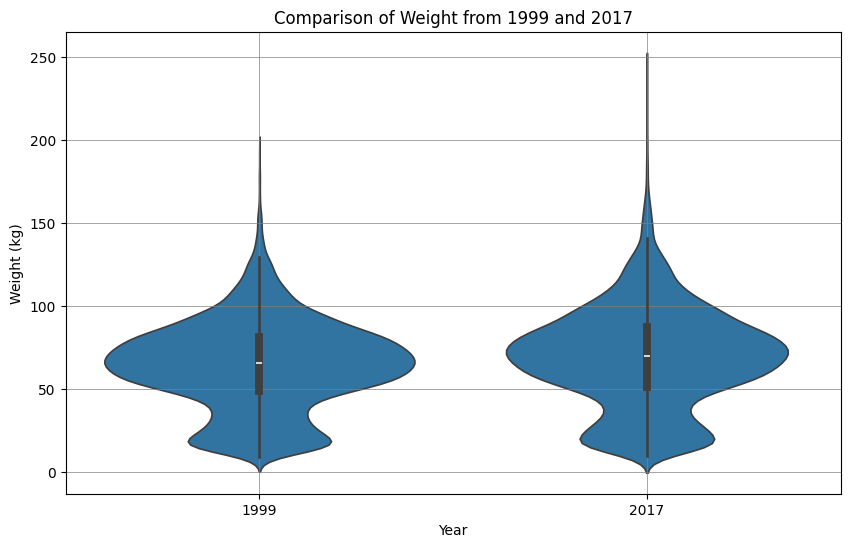

In [66]:
# We have large enough sample size to assume normality (CLT)
# First plot the weights
plt.figure(figsize=(10,6))
sns.violinplot(data=combined_df, x='Year', y='BMXWT')
plt.xlabel('Year')
plt.ylabel('Weight (kg)')
plt.title('Comparison of Weight from 1999 and 2017')
# Get current axis
ax = plt.gca()

# Add horizontal grid lines
ax.yaxis.grid(True)

# Customize grid lines (optional)
ax.grid(linestyle='-', linewidth='0.5', color='gray')
plt.show()

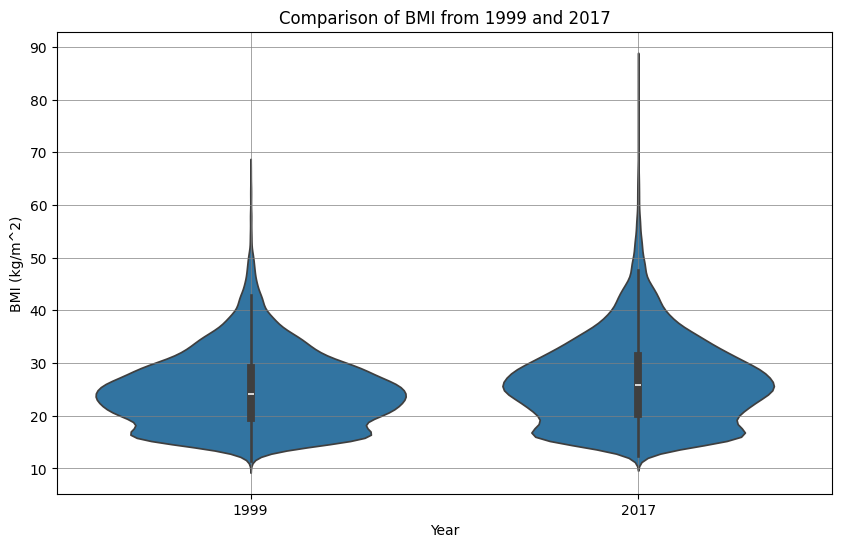

In [69]:
# Plot BMI
# Plot heights
plt.figure(figsize=(10,6))
sns.violinplot(data=combined_df, x='Year', y='BMI')
plt.xlabel('Year')
plt.ylabel('BMI (kg/m^2)')
plt.title('Comparison of BMI from 1999 and 2017')
# Get current axis
ax = plt.gca()

# Add horizontal grid lines
ax.yaxis.grid(True)

# Customize grid lines (optional)
ax.grid(linestyle='-', linewidth='0.5', color='gray')
plt.show()

In [96]:
# Statistical Test to see if any observed difference is statistically significant (probably not though)
mean_1999 = combined_df[combined_df['Year'] == 1999]['BMI'].mean()
mean_2017 = combined_df[combined_df['Year'] == 2017]['BMI'].mean()

print(f'BMI 1999: {mean_1999}, BMI 2017: {mean_2017}')

"""
Let p1 = the mean weight in 1999, and p2 = the mean weight in 2017.
H_0: p1 = p2
H_a: p1 != p2

Let alpha = 0.05
""" 
alpha = 0.05
df_1999 = combined_df[combined_df['Year'] == 1999]['BMI']
df_2017 = combined_df[combined_df['Year'] == 2017]['BMI']

t_stat, p_value = stats.ttest_ind(df_1999, df_2017, equal_var=False)

if p_value < alpha:
    print('Difference observed is statistically significant')
else:
    print('Difference observed is not statistically significant')

perc_change = ((mean_2017 - mean_1999) / mean_1999) * 100
print(f'Percent Change = {perc_change}%')

# 1999 Average BMI was still in the "Healthy Weight" Category. In 2017, BMI is firmly in "Overweight" Category.

BMI 1999: 24.894230349028597, BMI 2017: 26.57733492297062
Difference observed is statistically significant
Percent Change = 6.76102273636952%


# Examining Physical Activity Over Time

In [43]:
path = './data/PAQ/'

paq_list = []
for file in os.listdir(path=path):
    if file.endswith('.XPT'):
        file_path = os.path.join(path, file)

        # Load the XPT file
        df = pd.read_sas(file_path)
        
        # Clean up the PAQ file.
        df = df[~df['PAQ670'].isna()]
        df = df[~df['PAQ670'].isin([77, 99, '.'])]
        
        suffix_split = file.split('_')
        try:
            suffix_split = suffix_split[1].split('.')
            suffix_split = suffix_split[0]
        except IndexError:
            suffix_split = ''
        df['Year'] = suffix[suffix_split]
        paq_list.append(df)
        
paq_df = pd.concat(paq_list)
paq_df = paq_df[paq_df['Year'].isin([2009, 2017])]
paq_df

,SEQN,PAQ706,PAD590,PAD600,PAQ605,PAQ610,PAD615,PAQ620,PAQ625,PAD630,...,PAQ759V,PAQ762,PAQ764,PAQ766,PAQ679,PAQ750,PAQ770,PAQ772A,PAQ772B,PAQ772C
2,51626.0,NaN,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,51633.0,NaN,NaN,NaN,2.0,NaN,NaN,1.0,5.0,300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,51640.0,NaN,NaN,NaN,2.0,NaN,NaN,1.0,3.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,51641.0,NaN,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,51647.0,NaN,NaN,NaN,2.0,NaN,NaN,1.0,7.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5841,102933.0,NaN,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5843,102935.0,NaN,NaN,NaN,1.0,3.0,35.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5848,102947.0,NaN,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5852,102952.0,NaN,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


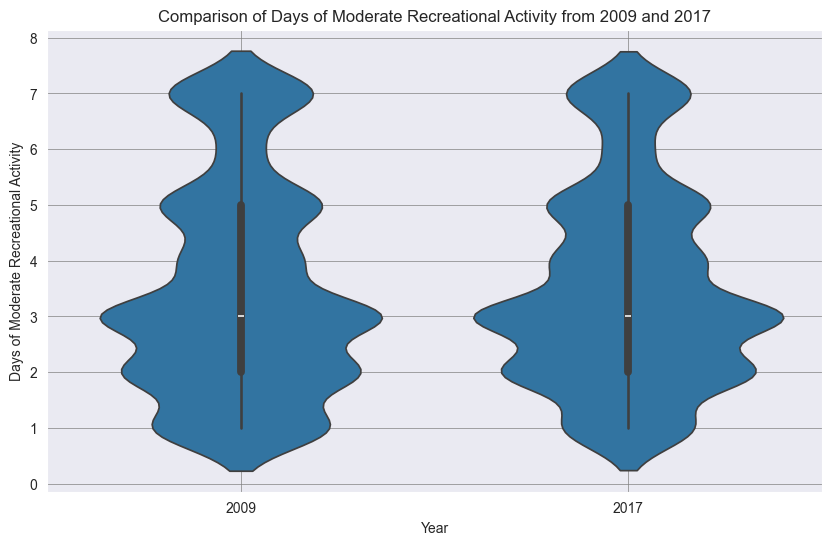

In [44]:
# Plot Physical Activity
plt.figure(figsize=(10,6))
sns.violinplot(data=paq_df, x='Year', y='PAQ670')
plt.xlabel('Year')
plt.ylabel('Days of Moderate Recreational Activity')
plt.title('Comparison of Days of Moderate Recreational Activity from 2009 and 2017')
# Get current axis
ax = plt.gca()

# Add horizontal grid lines
ax.yaxis.grid(True)

# Customize grid lines (optional)
ax.grid(linestyle='-', linewidth='0.5', color='gray')
plt.show()

In [45]:
# Statistical Test to see if any observed difference is statistically significant (probably not though)
paq_df_2009 = paq_df[paq_df['Year'] == 2009]['PAQ670']
paq_df_2017 = paq_df[paq_df['Year'] == 2017]['PAQ670']

mean_paq_2009 = paq_df[paq_df['Year'] == 2009]['PAQ670'].mean()
mean_paq_2017 = paq_df[paq_df['Year'] == 2017]['PAQ670'].mean()

print(f'Mean Sedentary 2009: {mean_paq_2009}, Mean Sedentary 2017: {mean_paq_2017}')

t_stat, p_value = stats.ttest_ind(paq_df_2009, paq_df_2017, equal_var=False)
p_value

Mean Sedentary 2009: 3.49781512605042, Mean Sedentary 2017: 3.5253796095444687


0.5869718520551623

# Examine Obesity Prevalence Over Time

In [2]:
path = './data/BMX/'
suffix = {
    '': 1999, 'B': 2001, 'C': 2003, 'D': 2005, 'E': 2007, 'F': 2009, 'G': 2011, 'H': 2013,
    'I': 2015, 'J': 2017
}

# Vars of interest: BMXWT: Weight in kg, BMXHT: Height in cm

df_list = []
for file in os.listdir(path=path):
    if file.endswith('.XPT'):
        file_path = os.path.join(path, file)

        # Load the XPT file
        df = pd.read_sas(file_path)
        # Verify no dupes and check nulls:
        unique_seqn = df['SEQN'].unique()
        print(f'Length of df3 matches # of seqn3? {len(df) == len(unique_seqn)} ({len(df)} == {len(unique_seqn)})')
        print(f'{file} has {len(df[df["BMXWT"].isna()])} nulls.')
        df = df[~df['BMXWT'].isna()]
        df = df[~df['BMXHT'].isna()]

        suffix_split = file.split('_')
        try:
            suffix_split = suffix_split[1].split('.')
            suffix_split = suffix_split[0]
        except IndexError:
            suffix_split = ''
        df['Year'] = suffix[suffix_split]
        df['BMI'] = df['BMXWT'] / ((df['BMXHT'] / 100) ** 2)
        df['Overweight (including obesity)'] = df['BMI'] >= 25
        df['Obese'] = df['BMI'] >= 30

        df_list.append(df)
    else:
        pass

combined_df = pd.concat(df_list)
bmi_df = combined_df[combined_df['Year'].isin([1999, 2017])]
bmi_df

Length of df3 matches # of seqn3? True (9282 == 9282)
BMX.XPT has 85 nulls.
Length of df3 matches # of seqn3? True (10477 == 10477)
BMX_B.XPT has 652 nulls.
Length of df3 matches # of seqn3? True (9643 == 9643)
BMX_C.XPT has 114 nulls.
Length of df3 matches # of seqn3? True (9950 == 9950)
BMX_D.XPT has 103 nulls.
Length of df3 matches # of seqn3? True (9762 == 9762)
BMX_E.XPT has 131 nulls.
Length of df3 matches # of seqn3? True (10253 == 10253)
BMX_F.XPT has 91 nulls.
Length of df3 matches # of seqn3? True (9338 == 9338)
BMX_G.XPT has 95 nulls.
Length of df3 matches # of seqn3? True (9813 == 9813)
BMX_H.XPT has 90 nulls.
Length of df3 matches # of seqn3? True (9544 == 9544)
BMX_I.XPT has 99 nulls.
Length of df3 matches # of seqn3? True (8704 == 8704)
BMX_J.XPT has 124 nulls.


,SEQN,BMAEXLEN,BMAEXSTS,BMAEXCMT,BMXWT,BMIWT,BMXRECUM,BMIRECUM,BMXHEAD,BMIHEAD,...,BMDCALFF,BMDBMIC,BMXSAD1,BMXSAD2,BMXSAD3,BMXSAD4,BMDAVSAD,BMDSADCM,BMXHIP,BMIHIP
0,1.0,289.0,1.0,NaN,12.5,3.0,93.2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,376.0,1.0,NaN,75.4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,199.0,1.0,NaN,32.9,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,277.0,1.0,NaN,92.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6.0,252.0,1.0,NaN,59.2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8699,102952.0,NaN,NaN,NaN,49.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.3,NaN
8700,102953.0,NaN,NaN,NaN,97.4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112.8,NaN
8701,102954.0,NaN,NaN,NaN,69.1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.7,NaN
8702,102955.0,NaN,NaN,NaN,111.9,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128.3,NaN


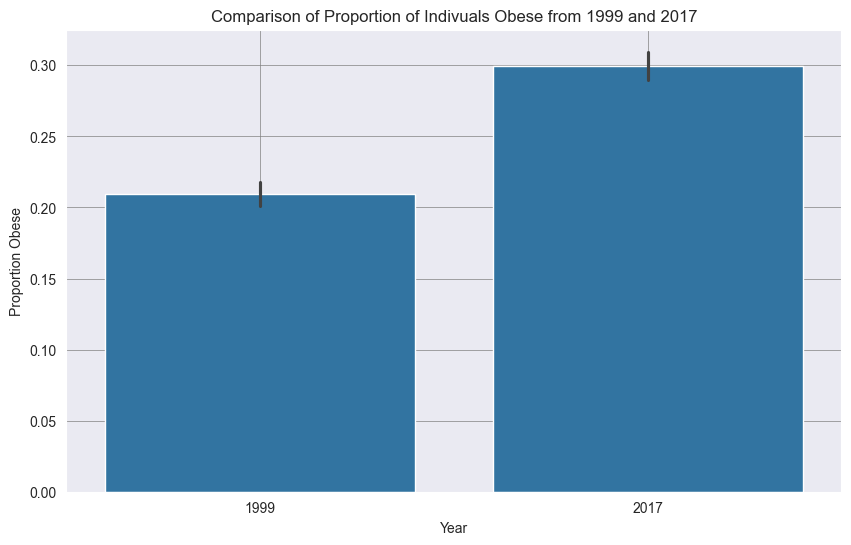

In [5]:
# Plot Physical Activity
plt.figure(figsize=(10,6))
sns.barplot(data=bmi_df, x='Year', y='Obese')
plt.xlabel('Year')
plt.ylabel('Proportion Obese')
plt.title('Comparison of Proportion of Indivuals Obese from 1999 and 2017')
# Get current axis
ax = plt.gca()

# Add horizontal grid lines
ax.yaxis.grid(True)

# Customize grid lines (optional)
ax.grid(linestyle='-', linewidth='0.5', color='gray')
plt.show()

In [ ]:
# Statistical Test to see if any observed difference is statistically significant
bmi_df_1999 = bmi_df[bmi_df['Year'] == 1999]['Obese']
paq_df_2017 = bmi_df[bmi_df['Year'] == 2017]['Obese']
